In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

defective_folder = r"C:\Users\thaba\Downloads\itmla3_project_dataset\CONCRETE CRACKS\Defective"
defectless_folder = r"C:\Users\thaba\Downloads\itmla3_project_dataset\CONCRETE CRACKS\Defectless"

def load_images_from_folder(folder, label):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        
        if img is not None:
            images.append(img)
            labels.append(label)
            count = count + 1
            print(count)
    print(count, "labeled as", label)
    return images, labels

defective_images, defective_labels = load_images_from_folder(defective_folder, 1)
defectless_images, defectless_labels = load_images_from_folder(defectless_folder, 0)

# Combine data
Xx = defective_images + defectless_images
Yy = defective_labels + defectless_labels
print(len(Xx))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


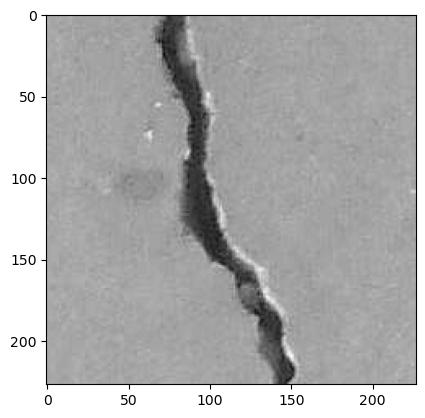

In [7]:
plt.imshow(Xx[0], cmap='gray')
plt.show()

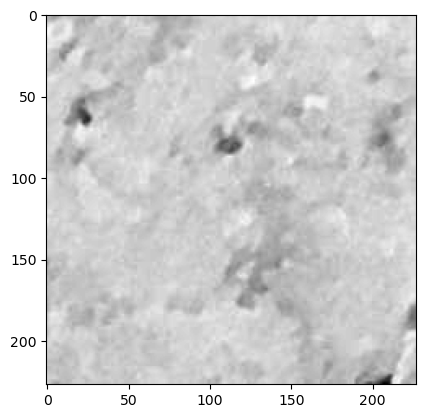

In [8]:
plt.imshow(Xx[19991], cmap='gray')
plt.show()

In [10]:
def image_enhancement(image):
    # Convert image to grayscale
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply histogram equalization for enhancing contrast
    enhanced_image = cv2.equalizeHist(gray_image)
    return enhanced_image


In [13]:
def feature_extraction(image):
    # Use Local Binary Patterns (LBP) for feature extraction
    radius = 3
    n_points = 8 * radius
    lbp = np.array(cv2.UMat(cv2.OLBP(image, radius, n_points)))
    histogram = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))[0]
    return histogram


In [ ]:
def feature_normalisation(features):
    # Normalize features using min-max scaling
    normalized_features = (features - np.min(features)) / (np.max(features) - np.min(features))
    return normalized_features


In [ ]:
def train_test_split(features, labels, test_size=0.2, random_state=42):
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test


In [ ]:
def classifier_training(X_train, y_train):
    # Train a Support Vector Machine (SVM) classifier
    classifier = SVC(kernel='rbf', C=1, gamma='scale')
    classifier.fit(X_train, y_train)
    return classifier


In [ ]:
def classifier_testing(classifier, X_test, y_test):
    # Test the classifier
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy


In [ ]:
# Main function
def main():
    # Load images and create labels
    # Assume 'defective_folder' contains images with defective concrete (with cracks)
    # and 'non_defective_folder' contains images with defectless concrete (without cracks)
    # Load and preprocess images
    defective_images = [image_enhancement(cv2.imread(image_path)) for image_path in defective_folder]
    non_defective_images = [image_enhancement(cv2.imread(image_path)) for image_path in non_defective_folder]
   
    # Extract features and create labels
    defective_features = [feature_extraction(image) for image in defective_images]
    non_defective_features = [feature_extraction(image) for image in non_defective_images]
    features = np.concatenate([defective_features, non_defective_features])
    labels = np.concatenate([np.ones(len(defective_features)), np.zeros(len(non_defective_features))])
    
    # Normalize features
    normalized_features = feature_normalisation(features)
    
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(normalized_features, labels)
    
    # Train classifier
    classifier = classifier_training(X_train, y_train)
    
    # Test classifier
    accuracy = classifier_testing(classifier, X_test, y_test)
    print("Accuracy:", accuracy)

if __name__ == "__main__":
    main()


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics (y_test, y_pred):
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1-Score: {:.2f}".format(f1))
    